In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [2]:
# 第一步下载数据集
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(root='../data',train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(root='../data',train=False,transform=trans,download=True)
len(mnist_train)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



60000

In [6]:
# 第二步，读取数据
# 第三部，数据预处理
mnist_test[1]
mnist_test[1][0].shape

torch.Size([1, 28, 28])

In [8]:
type(mnist_test[0])

tuple

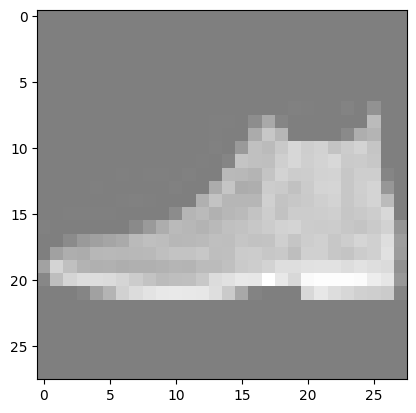

In [13]:
import matplotlib.pyplot as plt
images, label = mnist_test[0][0],mnist_test[0][1]
images_example = torchvision.utils.make_grid(images)
images_example = images_example.numpy().transpose(1,2,0) # 将图像的通道值置换到最后的维度，符合图像的格式
mean = [0.5,0.5,0.5]
std = [0.5,0.5,0.5]
images_example = images_example * std + mean
plt.imshow(images_example )
plt.show()


In [14]:
# 第四部，写datalodaer
batch_size=256

def get_dataloader_workers():
    '''设置dataloader的进程'''
    return 4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())
test=data.DataLoader(mnist_test,batch_size=len(test))

for X, y in train_iter:
    continue

In [25]:
# 第五步，确定网络结构 初始化模型参数
num_inputs=784
num_outputs=10

# w=torch.norm(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
# b=torch.zeros(num_outputs,requires_grad=True)
from torch import nn
net=nn.Sequential(nn.Flatten(),nn.Linear(num_inputs,num_outputs))

def init_weight(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weight)

loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epoches=10
for epoch in range(num_epoches):
    net.train()
    for X,y in train_iter:
        y_hat=net(X)
        l=loss(y_hat,y)
        trainer.zero_grad()
        l.mean().backward()
        trainer.step()
        print(l.sum()/y.numel())
    y_hat=net(mnist_test)
        


tensor(2.3104, grad_fn=<DivBackward0>)
tensor(2.1163, grad_fn=<DivBackward0>)
tensor(1.9235, grad_fn=<DivBackward0>)
tensor(1.7808, grad_fn=<DivBackward0>)
tensor(1.7101, grad_fn=<DivBackward0>)
tensor(1.6317, grad_fn=<DivBackward0>)
tensor(1.5527, grad_fn=<DivBackward0>)
tensor(1.4643, grad_fn=<DivBackward0>)
tensor(1.3379, grad_fn=<DivBackward0>)
tensor(1.3280, grad_fn=<DivBackward0>)
tensor(1.3443, grad_fn=<DivBackward0>)
tensor(1.2750, grad_fn=<DivBackward0>)
tensor(1.2873, grad_fn=<DivBackward0>)
tensor(1.2707, grad_fn=<DivBackward0>)
tensor(1.1867, grad_fn=<DivBackward0>)
tensor(1.2458, grad_fn=<DivBackward0>)
tensor(1.1129, grad_fn=<DivBackward0>)
tensor(1.1686, grad_fn=<DivBackward0>)
tensor(1.0714, grad_fn=<DivBackward0>)
tensor(1.0902, grad_fn=<DivBackward0>)
tensor(1.1031, grad_fn=<DivBackward0>)
tensor(1.0938, grad_fn=<DivBackward0>)
tensor(1.0310, grad_fn=<DivBackward0>)
tensor(1.0733, grad_fn=<DivBackward0>)
tensor(1.0636, grad_fn=<DivBackward0>)
tensor(1.0338, grad_fn=<D